<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 20px;">Random Forest</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">In this notebook, the data from feature engineering is read in (please make sure to run notebook feature engineering random forest first), a train-test split is performed and SKlearn's RandomForestRegressor is used to predict sales figures for 2012.<br> <br>
After applying this algorithm with the default hyperparameters, two GridSearchCVs are performed to tune the hyperparameters and refine our prediction. Then the algorithm is used again with these optimised hyperparameters. <br><br>
Finally, the results are displayed in lineplots so that the target weekly sales and the predicted target can be compared. In a final step, we show error plots. Here we have two scatter plots, one showing actual target and predicted target, while the other shows the residuals.<br><br>
Since this model performs weaker than Extra Trees, it is not included in the presentation.
</div>



<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Import modules</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from timeit import default_timer as timer

# import self-written functions to get metrics and split data
from metrics import get_metrics
from split import split_data, train_val_test
from error import error_analysis

RSEED=42


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data</div>

Here the dataframe with the features generated for Random Forest is used.

In [2]:
df = pd.read_pickle('../data/data_combined_clean_features_9.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

Considering the temporal structure of our data in combination with the structure of stores and departments, we do not use SKlearn's test-train split, but perform the split with code we have written ourselves.

In [3]:
#define train, validation and test dataset
X_train, y_train, X_validation, y_validation, X_test, y_test = split_data(df)

# making whole train, validation and test dataset accessable
train, validation, test = train_val_test(df)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Modelling: Random Forest</div>

In [4]:
# instantiate model
model = RandomForestRegressor(random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Random Forest</div>


In [5]:
# print results for train, validation and test using the above function
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 3693272.942
RMSE: 1921.789
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 12064706.403
RMSE: 3473.429
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7516356.235
RMSE: 2741.597
- - - - - - - - - - 


The RMSE on train data has reached a very well value, but the RMSE of validation and test data is a lot higher, so this model is overfitting. So we will in the next step try to reduce the overfitting by Hyperparameter Tuning with GridSearch.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hyperparameter Tuning: GridSearchCV</div>

In [8]:
# instantiate model
model = RandomForestRegressor(random_state=42)

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {
              "n_estimators" : [100, 150],
              "min_samples_leaf" : [5, 7, 10],
              "max_features" : [0.4, 0.5, 0.7, 'sqrt', 'log2'],
              "max_depth" : [15, 20, 25]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(RandomForestRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs.fit(X_train, y_train)

In [10]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5822.208
Best parameters: {'max_depth': 25, 'max_features': 0.4, 'min_samples_leaf': 5, 'n_estimators': 150}


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">RandomForest with tuned hyperparameters grid I</div>

In [11]:
# instantiate model
model = RandomForestRegressor(
    n_estimators=150, 
    max_features=0.4, 
    max_depth=25, 
    min_samples_leaf=5, 
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Random Forest with tuned parameter grid I</div>

In [12]:
# print results for train, validation and test using the above function
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 15014123.238
RMSE: 3874.806
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11798009.385
RMSE: 3434.823
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7075834.733
RMSE: 2660.044
- - - - - - - - - - 


This model performs slightly better on validation data (now: 3435 before: 3473) and on test data (now: 2660 before: 2742). The RMSE on train data is  a lot worse here (now: 3875 before: 1922). The advantage is that because of using the hyperparameters the train data is no longer completely overfitted. Because of this, all in all this model performs better than the first.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Hyperparameter Tuning: GridSearchCV II</div>

Next, we investigate whether we can still find optimisation potential in the close vicinity of the present best parameters.

In [ ]:
# Defining second parameter grid (as dictionary)
param_grid = {
              "n_estimators" : [125, 150, 175],
              "min_samples_leaf" : [4, 5, 6],
              "max_features" : [0.1, 0.3, 0.4, 'sqrt', 'log2'],
              "max_depth" : [22, 23, 25, 26]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(RandomForestRegressor(random_state=RSEED), 
                     param_grid, 
                     scoring= "neg_root_mean_squared_error",
                     cv=2,
                     verbose=5,
                     n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
gs.fit(X_train, y_train)

In [14]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -5709.148
Best parameters: {'max_depth': 25, 'max_features': 0.4, 'min_samples_leaf': 4, 'n_estimators': 175}


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Calculating metrics for Random Forest with tuned parameter grid II</div>

In [6]:
# instantiate model
model = RandomForestRegressor(
    n_estimators=175, 
    max_features=0.4, 
    max_depth=25, 
    min_samples_leaf=4, 
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [7]:
# print results for train, validation and test using the above function
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 12736268.934
RMSE: 3568.791
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11663570.155
RMSE: 3415.197
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7011629.454
RMSE: 2647.948
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">As the prediction of this third model is even slightly better than the second one, we will now go on with this model.</div>

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [8]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target </div>

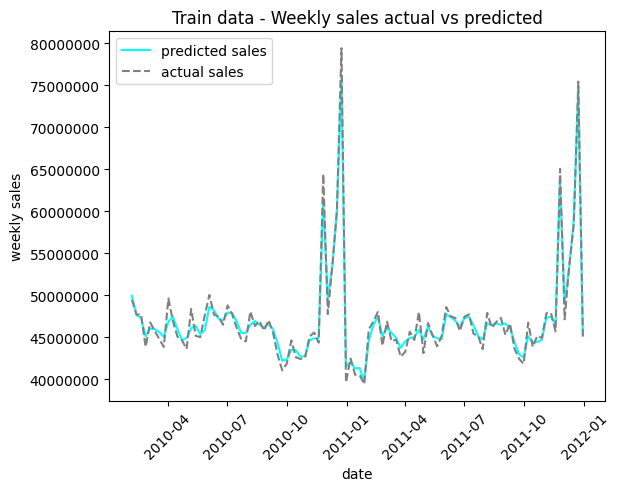

In [9]:
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Train data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

As one can see in the above chart, the blue line visualising the predicted target values is nearly covered by the grey dashed line showing actual values.

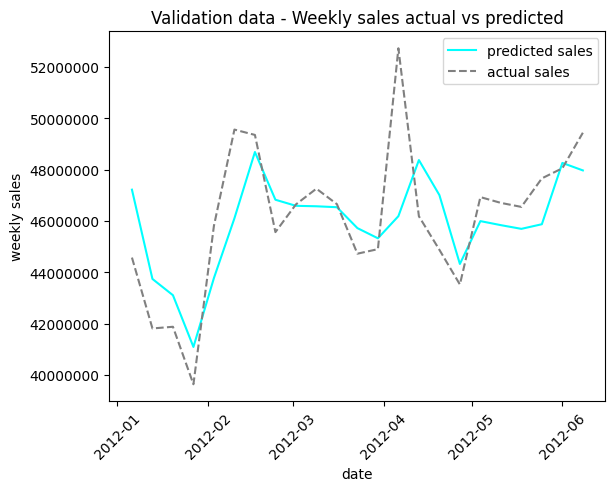

In [10]:
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

In validation data the predicted sales are still predicting well with a short time lag. The large peek isn't well covered by the model.

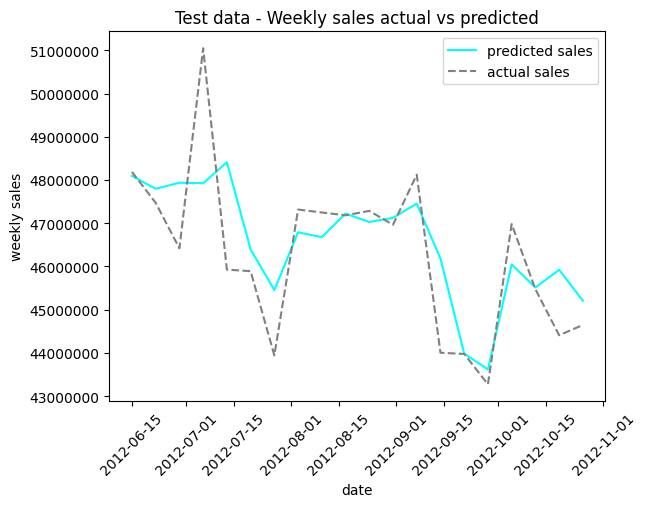

In [11]:
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'),
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None,
             color='grey', linestyle='--')
plt.title('Test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

Same in the test data. Again the model predicts all in all well with a short time lag, but it has difficulties to predict the extreme outliers.

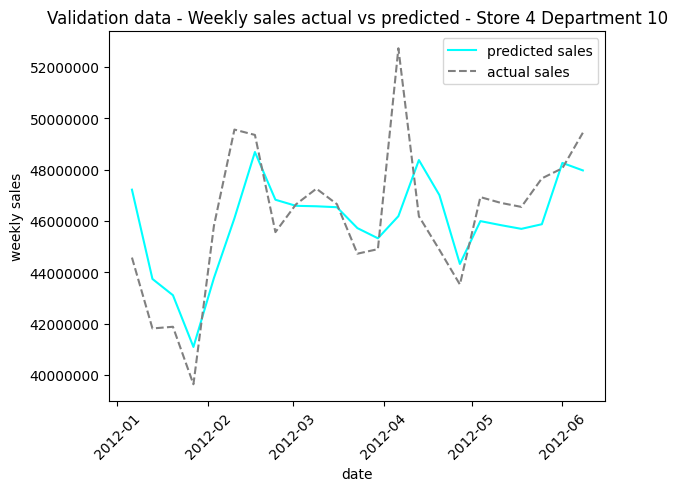

In [12]:
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, label='predicted sales', color='cyan')
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), errorbar=None,
             label ='actual sales', color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted - Store 4 Department 10')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

Here we just see an example of the prediction for a specific Store and Department. The general effect can be found on the micro level as well.

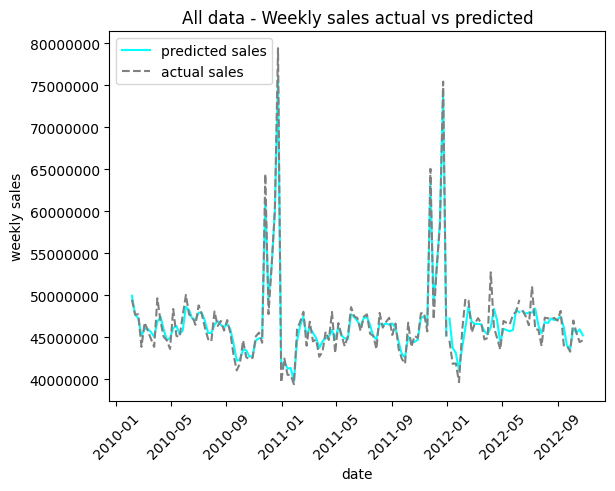

In [13]:
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'), errorbar=None,
             label='predicted sales', color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), errorbar=None,
             label ='actual sales', color='grey', linestyle='--')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), errorbar=None,
             color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), errorbar=None,
             color='grey', linestyle='--')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'), errorbar=None,
            color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'), errorbar=None,
            color='grey', linestyle='--')
plt.title('All data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Train</div>

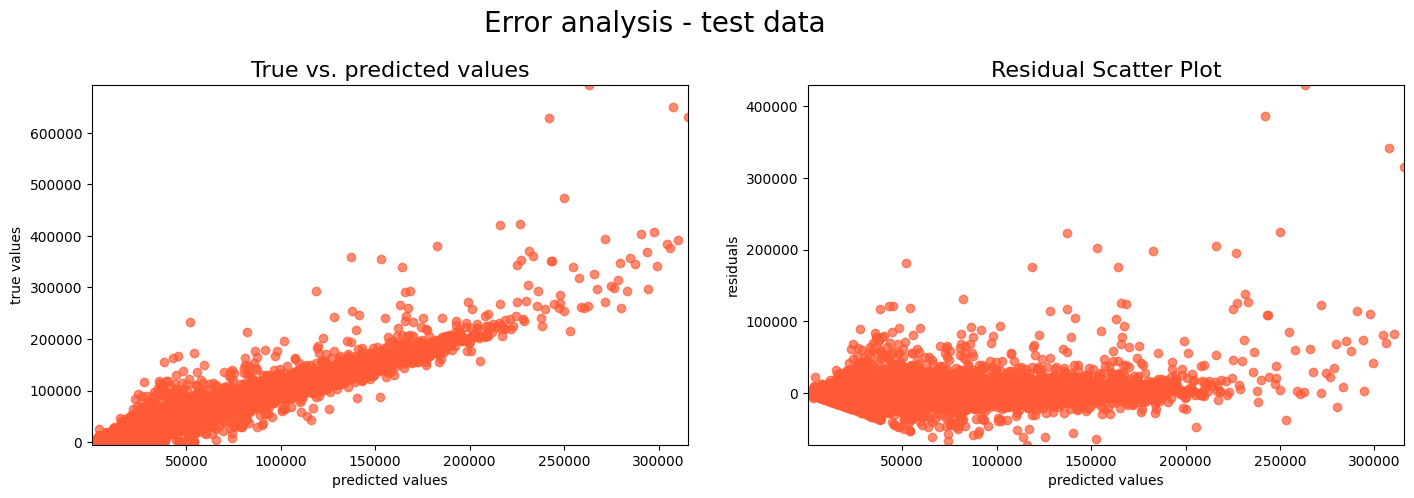

In [14]:
error_analysis(y_train, y_pred_train)
plt.suptitle('Error analysis - test data', fontsize=20)
plt.subplots_adjust(top=0.83);

Most of the values of the Residual Scatter Plot are scattered around zero. But what we can also see here, that there are some outliers, which means data points with large residuals, that could significantly influence the model. In the next step we want to find out more about the patterns of these outliers.

In [ ]:
# having a look at observations with largest residuals
train['Residuals'] = train.Weekly_Sales - train.Predicted_Sales
train.query('Residuals >= 100000 or Residuals <= -100000')

The majority of the residuals that exceed or fall below the range named in the code block above belong to Store 10, 14, and 35. Further research can be done at this point in the future.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Validation</div>

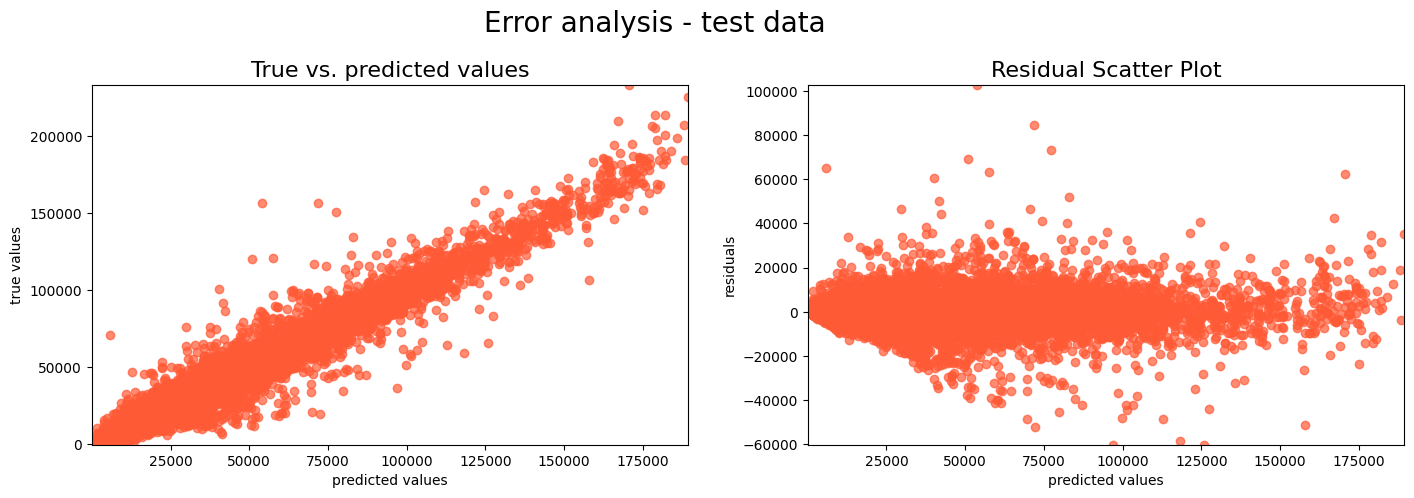

In [16]:
error_analysis(y_validation, y_pred_validation)
plt.suptitle('Error analysis - test data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [ ]:
# having a look at observations with largest residuals
validation['Residuals'] = validation.Weekly_Sales - validation.Predicted_Sales
validation.query('Residuals >= 40000 or Residuals <= -40000')

The majority of the residuals that exceed or fall below the range named in the code block above belong to Store 10, 14 and 20. Further research can be done at this point in the future.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Error Analysis Test</div>

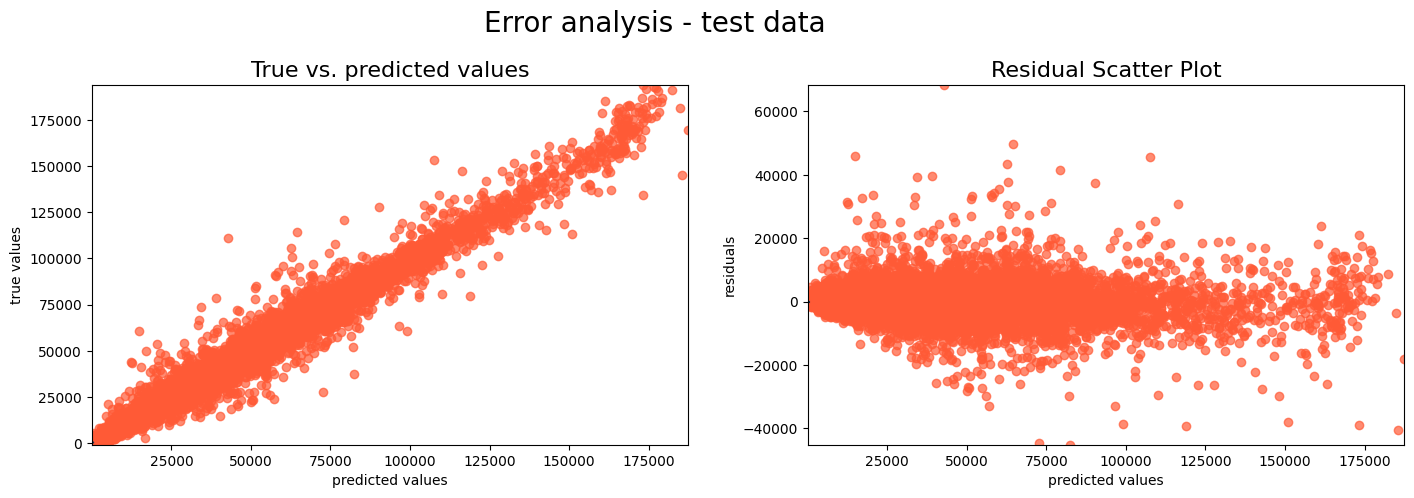

In [29]:
error_analysis(y_test, y_pred_test)
plt.suptitle('Error analysis - test data', fontsize=20)
plt.subplots_adjust(top=0.83);

In [ ]:
# having a look at observations with largest residuals
test['Residuals'] = test.Weekly_Sales - test.Predicted_Sales
test.query('Residuals >= 38000 or Residuals <= -38000')

The majority of the residuals that exceed or fall below the range named in the code block above belong to Store 10, 13, 14 and 28. Further research can be done at this point in the future.

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Merge validation and test</div>

In [17]:
validation_and_test = pd.concat([validation, test], axis=0)

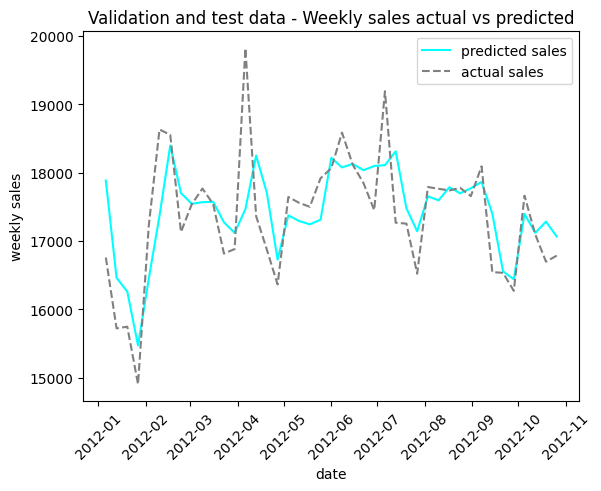

In [18]:
sns.lineplot(data=validation_and_test, x='Date', y='Predicted_Sales', errorbar=None,
             label='predicted sales', color='cyan')
sns.lineplot(data=validation_and_test, x='Date', y='Weekly_Sales', errorbar=None,
             label ='actual sales', color='grey', linestyle='--')
plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend();